<a href="https://colab.research.google.com/github/pinky-thakur/NYC_Taxi_Trip_Time_Prediction_Capstone_Project/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Importing Required Libraries

In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

from scipy import stats as st

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To calculate the distance between two locations
from haversine import haversine, Unit

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
sns.set_palette('gist_ncar')

In [2]:
# Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Dataset from csv file

In [ ]:
# Using pandas read_csv method to load the data
path = '/content/drive/MyDrive/NYC_Taxi_Trip_Time_Prediction_Capstone_Project/NYC Taxi Data.csv'
data = pd.read_csv(path)

### Getting the first 5 rows of the data.

In [ ]:
# using pandas head function.

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Getting the last 5 rows of the data.

In [ ]:
# using pandas tail function.

data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Getting the columns present in our data.

In [ ]:
# using pandas columns method

print('Columns in our data:')

data.columns.tolist()

Columns in our data:


['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

### Getting the shape of the data.

In [ ]:
# using pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
data.shape

Shape of our dataset : 


(1458644, 11)

In [ ]:
print('Number of columns : ',data.shape[1],'\n')

print('number of rows : ',data.shape[0])

Number of columns :  11 

number of rows :  1458644


* <b>Checking the data types of each column</b>

In [ ]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# Inference:
* As we can see here that <b>pickup_datetime</b> and <b>'dropoff_datetime'</b> is not in proper data type i.e <b>'datetime'</b>.

In [ ]:
# Converting pickup_datetime and 'dropoff_datetime' to datetime using pandas to_datetime method

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [ ]:
# again Checking data types

data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

* Now we can see that <b>pickup_datetime</b> and <b>'dropoff_datetime'</b> is now in required data type i.e <b>datetime</b>. 

### Getting the type of data present in columns.

In [ ]:
# printing the number of numerical features and number of categorical features 

num_col = data.select_dtypes(include = 'number')
print("The number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

The number of Numerical columns are: 7

The number of Categorical columns are: 2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


#### Summary Statistic of the numeric columns

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


#### Summary Statistic of object form data of columns

In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
id,1458644,1458644,id2875421,1
store_and_fwd_flag,1458644,2,N,1450599


In [ ]:
# In our dataset there are lots of unique values in lots of columns 
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(data[column].unique()) for column in data.columns}

In [ ]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [ ]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True)

,Column_name,Number_of_Unique_Values
0,vendor_id,2
1,store_and_fwd_flag,2
2,passenger_count,10
3,trip_duration,7417
4,pickup_longitude,23047
5,dropoff_longitude,33821
6,pickup_latitude,45245
7,dropoff_latitude,62519
8,pickup_datetime,1380222
9,dropoff_datetime,1380377


### Data Cleaning and Removal of duplicate enteries from the Data

As data cleaning is an important task before we perform any kind of analysis on dataset, we will remove or replace the not necessary data from our dataset so that we can get desired outputs by performing EDA on it.

We have perfrom following cleaning strategy to overcome the data ambiguity:


* Getting missing data
* Handling missing data
* Checking for duplicate data
* Removing duplicate data

* <b>Getting missing data</b>

In [ ]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and 
# sum() is use to get the sum of missing values present in each column in dataset

print(data.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


# Inference

* Here we can see that there is <b>no missing value</b> in any feature of our data.


* So we donot need to perform the missing value handling task

* <b>Checking for duplicate data</b>

In [ ]:
data[data.duplicated()].size

0

* There is also <b>not any duplicate data</b> present in our dataset.

### Data Pre-processing

* As we can see that we are required more information from our data that will help us to understand the real scenario of the problem statement.Like we are unable to check the trends and the demands of the customers for taxi servies that in which time and duration on which day of the week the custormers take taxi service more or less.


1. We don't have month wise data of the taxi trips
2. We also don't have the week and day of week wise data
3. We also don't have the data according to the hours by which we can check what are the peak hours when taxi service is in more demand.
4. We also don't have the distance between pickup and drop location of taxi trips 


* So no we will create some new columns that will contail required data to deep dig into the dataset and to extract more insight from it.

* Creating <b>pickup_month</b> and <b>dropoff_month</b> that will contain the month in which the taxi trip was taken.

In [ ]:
# using pandas dt.month attribute to extract the month from our datetime columns.

data['pickup_month'] = data['pickup_datetime'].dt.month
data['dropoff_month'] = data['dropoff_datetime'].dt.month

* Creating <b>pickup_weekday</b> and <b>dropoff_weekday</b> that will contain the week day in which the taxi trip was taken.

In [ ]:
# using pandas dt.weekday attribute to extract the weekday from our datetime columns.

data['pickup_weekday'] = data['pickup_datetime'].dt.weekday
data['dropoff_weekday'] = data['dropoff_datetime'].dt.weekday

<b> 0 - Monday | 1 - Tuesday | 2 - Wednesday | 3 - Thursday | 4 - Friday | 5 - Saturday | 6 - Sunday</b>

* Creating <b>pickup_hour</b> and <b>dropoff_hour</b> that will contain the name of hour in which the taxi trip was taken.

In [ ]:
# using pandas dt.hour attribute to extract the weekday from our datetime columns.

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

* Creating <b>pickup_minutes</b> and <b>dropoff_minutes</b> that will contain the minute in which the taxi trip was taken and completed.

In [ ]:
# using pandas minute attribute to extract the weekday from our datetime columns.

data['pickup_minute'] = data['pickup_datetime'].dt.minute
data['dropoff_minute'] = data['dropoff_datetime'].dt.minute

* Creating <b>pickup_day</b> and <b>dropoff_dat</b> that will contain the day number of the month in which the taxi trip was taken and completed.

In [ ]:
# using pandas day attribute to extract the month day number from our datetime columns.

data['pickup_day'] = data['pickup_datetime'].dt.day
data['dropoff_day'] = data['dropoff_datetime'].dt.day

* Now we will create 1 more column that will contain the distance between each taxi trip 

* As we have already provide columns which includes <b>pickup_longitude</b>, <b>pickup_latitude</b> and <b>dropoff_longitude</b>, <b>dropoff_latitude</b> which will help us to get the pickup and dropoff location and then will calculate the distance between them.


* So to calculate the distance between two location using longitude and latitude we will use Haversine Formula which can be used in python by importing library called <b> haversine</b> which I we have already imported.

In [ ]:
# to get the distance for each taxi trip we will define a function 
# and take location coordinates as input and then we will apply the haversine method to it.

def calculate_distance(pickup_long, pickup_lat, dropoff_long, dropoff_lat):
    
    # Creating two variables start_loc and drop_loc which contains two required longitude and latitude coordinates.
    
    start_loc = (pickup_long, pickup_lat)
    drop_loc = (dropoff_long, dropoff_lat)
    
    # using haversine function get the distance between 2 locations 
    # and the distance is taken in kilometers to we have passed unit as km
    
    return haversine(start_loc, drop_loc, unit='km')

* Now we will create a column <b>trip_distance</b> which contain the <b>distance</b> for each taxi trip.

In [ ]:
data['trip_distance'] = data.apply(lambda x : calculate_distance(x['pickup_longitude'], 
                                                                 x['pickup_latitude'], 
                                                                 x['dropoff_longitude'], 
                                                                 x['dropoff_latitude']), axis = 1)

In [ ]:
# Again checking data types of all columns

data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_month                   int64
dropoff_month                  int64
pickup_weekday                 int64
dropoff_weekday                int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_minute                  int64
dropoff_minute                 int64
pickup_day                     int64
dropoff_day                    int64
trip_distance                float64
dtype: object

In [ ]:
# Now again checking top 5 rows from our data

data.head().T

,0,1,2,3,4
id,id2875421,id2377394,id3858529,id3504673,id2181028
vendor_id,2,1,2,2,2
pickup_datetime,2016-03-14 17:24:55,2016-06-12 00:43:35,2016-01-19 11:35:24,2016-04-06 19:32:31,2016-03-26 13:30:55
dropoff_datetime,2016-03-14 17:32:30,2016-06-12 00:54:38,2016-01-19 12:10:48,2016-04-06 19:39:40,2016-03-26 13:38:10
passenger_count,1,1,1,1,1
pickup_longitude,-73.982155,-73.980415,-73.979027,-74.01004,-73.973053
pickup_latitude,40.767937,40.738564,40.763939,40.719971,40.793209
dropoff_longitude,-73.96463,-73.999481,-74.005333,-74.012268,-73.972923
dropoff_latitude,40.765602,40.731152,40.710087,40.706718,40.78252
store_and_fwd_flag,N,N,N,N,N


* We can see that we have successfully created the columns which will help us to deep dive into our data and make our analysis more insight full.

### Let's Explore Variables(Features) Present in our Dataset

In [ ]:
# Checking unique passenger count in passenger_columnnusing pandas value_count method

data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

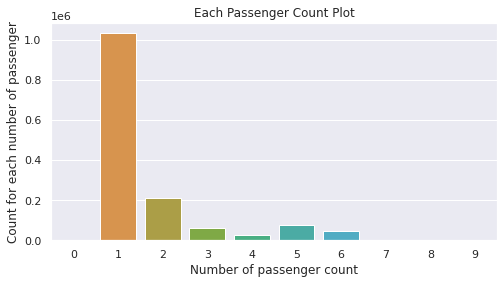

In [ ]:
# ploting count plot for passenger_count column so we can get more clearity
# we are using count plot from seaborn.

plt.figure(figsize = (8, 4))
sns.countplot(data['passenger_count'])

plt.title('Each Passenger Count Plot')

plt.xlabel('Number of passenger count')
plt.ylabel('Count for each number of passenger')

plt.show()

# Inference
* Here we can see that there is no trip if <b>passenger_count</b> is <b>0</b> but there are trip registered in the data where <b>passenger_count</b> is <b>0</b>. 
* And also there is <b>exremly low count</b> where <b>passenger_count</b> is <b>7, 8, 9</b> which is <b>affecting our data</b>.

* So we will drop all the rows where <b>passenger_count</b> is <b>0, 7, 8, 9</b>.

In [ ]:
# seperating out data where passenger_count = 0 

data = data[(data['passenger_count'] != 0) & (data['passenger_count'] <= 6)]

In [ ]:
# Checking unique passenger count in passenger_column using pandas value_count method

data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

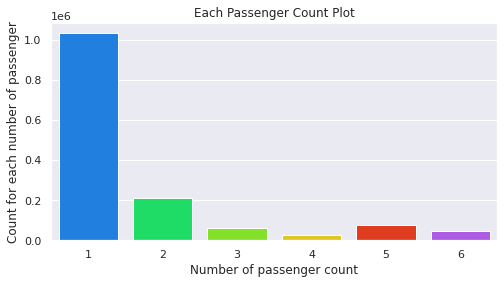

In [ ]:
# ploting count plot for passenger_count column so we can get more clearity
# we are using count plot from seaborn.

plt.figure(figsize = (8, 4))
sns.countplot(data['passenger_count'])

plt.title('Each Passenger Count Plot')

plt.xlabel('Number of passenger count')
plt.ylabel('Count for each number of passenger')

plt.show()

# Inference:
* We <b>successfully removed</b> all the <b>non required passenger_count</b> from out data.

In [ ]:
# Checking distance in trip_distance column using pandas value_count method

data['trip_distance'].value_counts()

0.000000    5887
0.000848      71
0.000848      51
0.000848      24
0.001697      19
            ... 
2.435922       1
0.568847       1
1.090320       1
1.007099       1
0.795869       1
Name: trip_distance, Length: 1452450, dtype: int64

# Inference:
* Here we can see that in <b>distance = 0</b> there are so many <b>count(5887)</b> which indicates that these trips are not required.


* It can be happened due to some updation error or may be deliberatly done by the taxi drivers so that they can show the trip has been done by them.


* Or may be Trip was canceled by the customer.


* So we will remove these values from our data.

In [ ]:
# seperating our data that will not contail trip distance = 0.0km

data = data[data['trip_distance'] != data['trip_distance'].min()]

In [ ]:
# Checking max trip duration from trip_duration column using max method

data['trip_duration'].max()

# Converting this duration to hours by dividing it by 3600

max_trip_hr = data['trip_duration'].max() / 3600

print("The Max trip hour is : ", max_trip_hr)

The Max trip hour is :  979.5227777777778


* Here we can see that trip of 979 hour is very abnormal trip which is present in our data.

In [ ]:
# Also checking other values present in our data

data['trip_duration'].sort_values(ascending= False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1439166          1
467645           1
311745           1
1034341          1
1306890          1
Name: trip_duration, Length: 1452692, dtype: int64

In [ ]:
1939736 / 3600

538.8155555555555

# Inference :
* We can see that in some entries there are very high numbers in trip duration.


* 3526282 / 3600 = <b>979.5 Hrs</b>
* 2227612 / 3600 = <b>618.7 Hrs</b>
* 2049578 / 3600 = <b>569.3 Hrs</b>
* 1939736 / 3600 = <b>538.8 Hrs</b>

* We will work on them in outlier treatment section

* **Let us check the distribution for each of the variable**

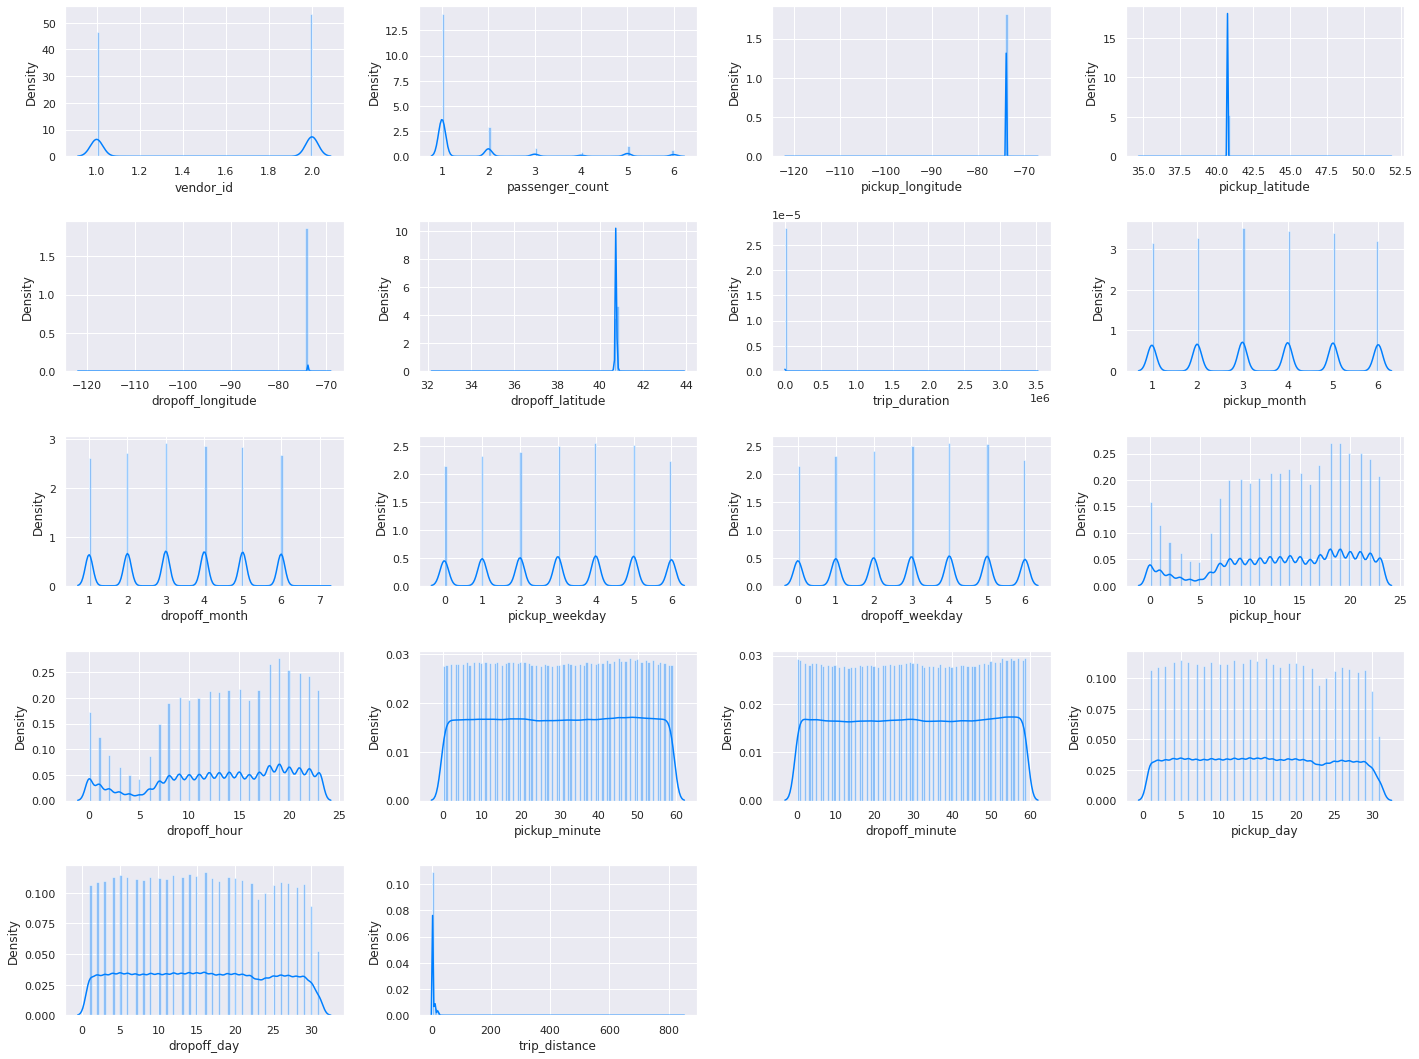

In [ ]:
# ploting distribution for each numerical variable present in our data set
# using distplot from seaborn

columns = data.select_dtypes(include=np.number).columns.tolist()

n = 1

plt.figure(figsize=(20,15))

for column in columns:   
    
    plt.subplot(5,4,n)
    
    n = n+1
    sns.distplot(data[column], bins = 100)
    
    plt.tight_layout()

**We can easily see that many of the columns are not in proper distribution**
* **We are taking latitude and longitude as it as these are the location coordinates**

* We can also observe that over target variable **trip_duration** is highly skewed to the right as it has so many outliers in it and also same with **trip distance.**

**Let us see them in the outlier treatment.**

## Checking Outliers in our data

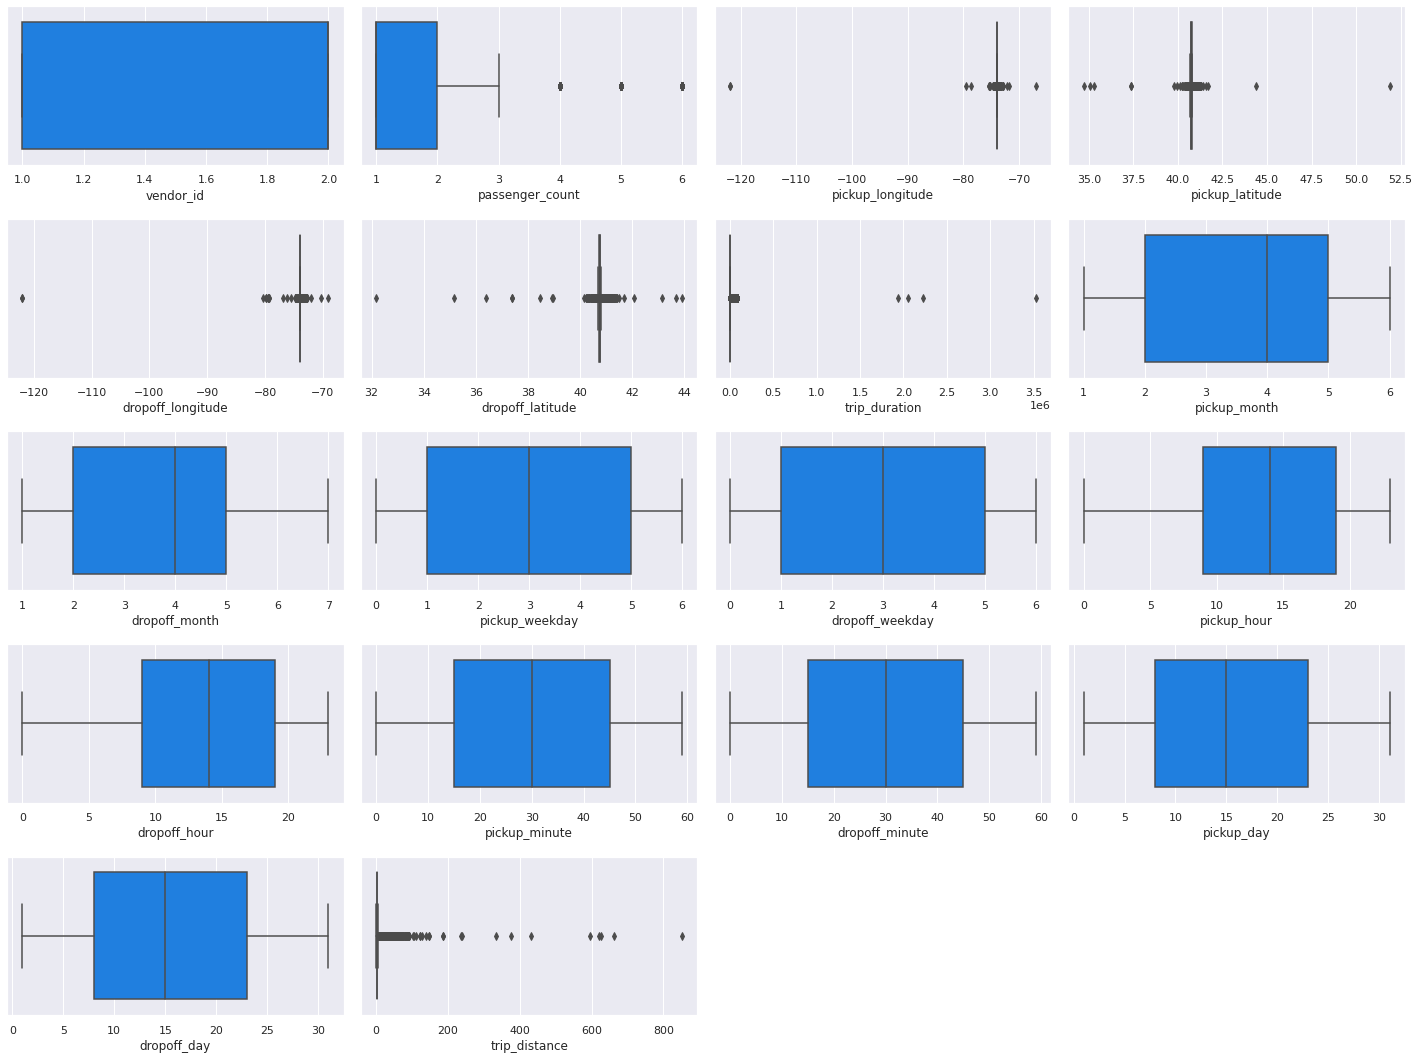

In [ ]:
# ploting the box plots into subplots of each column

columns = data.select_dtypes(include=np.number).columns.tolist()
n = 1

plt.figure(figsize=(20,15))

for column in columns:
    plt.subplot(5,4,n)
    n = n+1
    sns.boxplot(data[column])
    plt.tight_layout()
    

**As we already saw that trip duration has some trips that are not normal which are very higher like 900 + hrs in time duration but also we can see that there are some trip of no time**

* **If we try to remove that values till third standard deviation than also there will be outliers as trip duration contains duration of various and unique time let us try to transform our data so that we can get some improvement in our trip duration column**

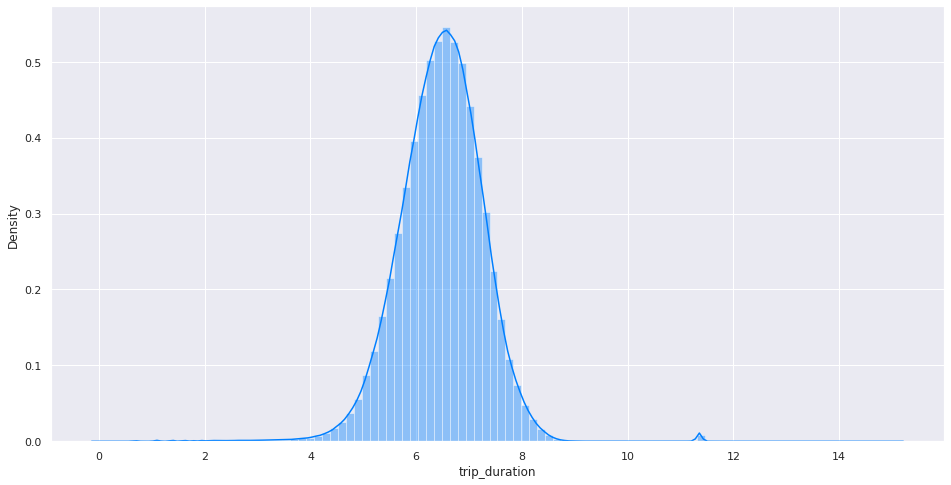

In [ ]:
# converting our trip_duration column into log transformation
# and then cheking distribution

plt.figure(figsize=(16, 8))
sns.distplot(np.log(data['trip_duration']), bins = 100)

plt.show()

**Here we can observe that the distribution is now in normal distribution but also the is some smal peak but we will use log transformed column for the training.**

### Data Analysis Using visualization method that will help us to extract more insights.

### EDA (EXPLORATORY DATA ANALYSIS)

### Univariate Analysis

* <b>Ploting count plot using seaborn to check how much bookings are done for each vendor type.</b>

In [ ]:
# Checking unique vendor count in vendor_id nusing pandas value_count method

data['vendor_id'].value_counts()

2    776613
1    676079
Name: vendor_id, dtype: int64

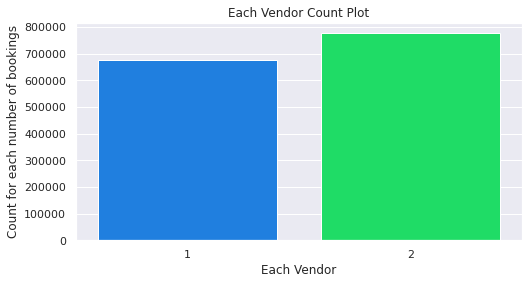

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(data['vendor_id'])

plt.title('Each Vendor Count Plot')

plt.xlabel('Each Vendor')
plt.ylabel('Count for each number of bookings')

plt.show()

In [ ]:
# Percentage For Vendor_id Column
(data['vendor_id'].value_counts() / data['vendor_id'].count()) * 100

2    53.460265
1    46.539735
Name: vendor_id, dtype: float64

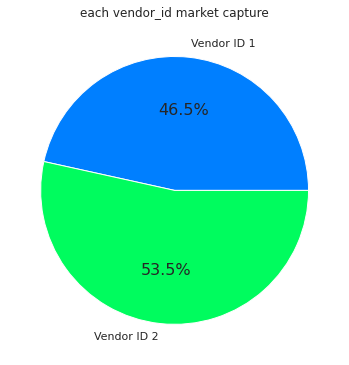

In [ ]:
#Calculating percentages of each vendor_id market capture

v1_percntg = abs(len(data[data['vendor_id'] == 1])/len(data)*100)

v2_percntg = abs(len(data[data['vendor_id'] == 2])/len(data)*100)

total_prcntg = [v1_percntg, v2_percntg]

# Creating a pie chart
plt.figure(figsize = (6,8))

plt.pie(total_prcntg, labels = ['Vendor ID 1','Vendor ID 2'], autopct = '%.1f%%')

plt.title('each vendor_id market capture')

plt.show()

# Inference :
* We can see that for vendor 2 there are more number of bookings which is of 54 %.

* <b>Checking how much bookings are done for each passenger_count.</b>

In [ ]:
# Checking unique vendor count in vendor_id nusing pandas value_count method

data['passenger_count'].value_counts()

1    1029343
2     209505
5      77810
3      59696
6      48063
4      28275
Name: passenger_count, dtype: int64

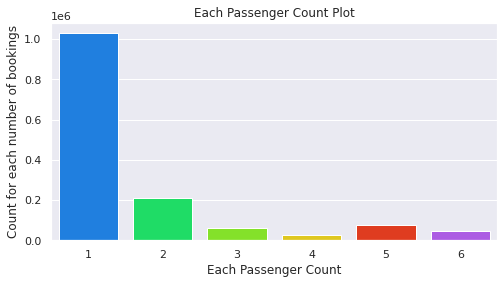

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(data['passenger_count'])

plt.title('Each Passenger Count Plot')

plt.xlabel('Each Passenger Count')
plt.ylabel('Count for each number of bookings')

plt.show()

# Inference :
* We can notice that when a taxi ride is booked by only a single person there are more number of bookings is high as compare to multiple people booking the taxi ride.

* <b>Checking the rate of bookings according to week days</b>

In [ ]:
data['pickup_weekday'].value_counts()

4    222604
5    219994
3    217649
2    209293
1    201927
6    194552
0    186673
Name: pickup_weekday, dtype: int64

<b> 0 - Monday | 1 - Tuesday | 2 - Wednesday | 3 - Thursday | 4 - Friday | 5 - Saturday | 6 - Sunday</b>

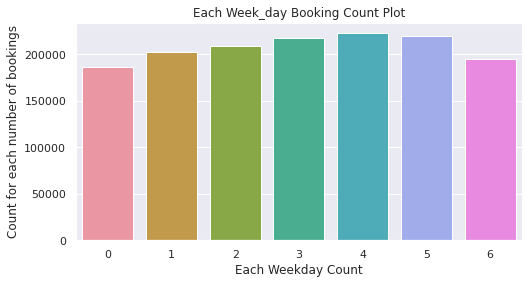

In [ ]:
plt.figure(figsize = (8, 4))

sns.countplot(data['pickup_weekday'])

plt.title('Each Week_day Booking Count Plot')

plt.xlabel('Each Weekday Count')
plt.ylabel('Count for each number of bookings')

plt.show()

# Inference :
* We can see that on weekends <b> 4 - Friday | 5 - Saturday</b> there are high booking rate for taxi as compare to other days.
* This indicates that people use to go out for their celebrations | parties | or may be for other personel works on weekends.

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_day,dropoff_day,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,0,0,17,17,24,32,14,14,1.949980
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,0,0,43,54,12,12,2.132181
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,11,12,35,10,19,19,3.359043
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,2,2,19,19,32,39,6,6,0.475520
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,5,5,13,13,30,38,26,26,0.328461


In [ ]:
data['store_and_fwd_flag'].value_counts()

N    1444715
Y       7977
Name: store_and_fwd_flag, dtype: int64

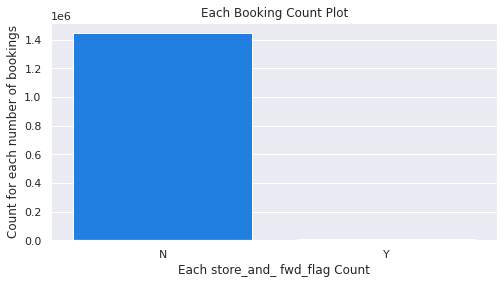

In [ ]:
plt.figure(figsize = (8, 4))

sns.countplot(data['store_and_fwd_flag'])

plt.title('Each Booking Count Plot')

plt.xlabel('Each store_and_ fwd_flag Count')
plt.ylabel('Count for each number of bookings')

plt.show()

# Inference :
* This shows that there is very less count when the <b>store_and_ fwd_flag</b> is Marked <b>Yes</b> and most of the time the taxi rider haven't connected to the servers of Vendor.